In [1]:
import numpy as np
import pandas as pd

import scipy
import statsmodels

from statsmodels.stats.weightstats import *

Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [130]:
mu = 9.5
sigma = 0.4

In [131]:
n = 160
x = 9.57

In [158]:
se = sigma/n**0.5
z = (x-mu)/se
z

2.213594362117875

In [160]:
round(2*(1-scipy.stats.norm.cdf(z)),4)

0.0269

In [155]:
scipy.stats.norm.pdf(z)

0.03442616018207645

Имеются данные о стоимости и размерах 53940 бриллиантов:

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости 

α=0.05?

In [105]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [106]:
data = pd.read_csv('diamonds.txt', delimiter= '\t')
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [107]:
X = data.drop('price', 1)
y = data['price']
y = y.reset_index(drop=True)

In [108]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state = 1)

 1)На обучающей выборке настройте линейную регрессию с помощью LinearRegression без параметров 

In [109]:
from sklearn.linear_model import LinearRegression

In [112]:
model = LinearRegression().fit(X_train, y_train)

In [113]:
res = model.predict(X_test)

In [114]:
lin_dif = abs(res - y_test)

случайный лес с помощью RandomForestRegressor 

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [135]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
f_res = forest.predict(X_test)

In [136]:
f_dif = abs(f_res - y_test)

In [137]:
f_dif = f_dif.to_numpy()

In [ ]:
lin_dif = lin_dif.to_numpy()

Построим QQ-plot для разноcти модулей отклонений

((array([-3.88388616, -3.66274206, -3.54151337, ...,  3.54151337,
          3.66274206,  3.88388616]),
  array([-7150.39686053, -6636.00668231, -4703.81637917, ...,
          8927.10783436, 10253.3657726 , 16377.45636008])),
 (651.4149940345404, 110.6646420727418, 0.9140952559892396))

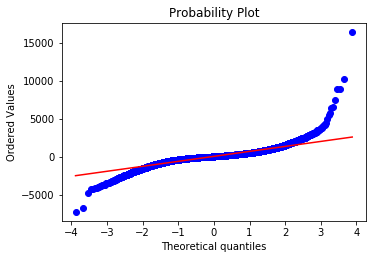

In [139]:
import pylab
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(lin_dif - f_dif, dist="norm", plot=pylab)

Критерий Шапиро-Уилка: 

𝐻0:  попарные разности распределены нормально.

𝐻1:  не нормально.

In [140]:
stats.shapiro(lin_dif - f_dif)

/Users/hannalaurynovich/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8366018533706665, 0.0)

Применим Критерий Стьюдента для связных выборок

In [141]:
stats.ttest_rel(lin_dif, f_dif)

Ttest_relResult(statistic=18.037259744511182, pvalue=6.936823477557568e-72)

In [142]:
np.mean(lin_dif)

890.3764004285604

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [143]:
import sklearn.metrics as metrics
l_mean = metrics.mean_absolute_error(y_test, res)

In [144]:
f_mean = metrics.mean_absolute_error(y_test, f_res)
f_mean

779.7117583558185

In [148]:
l_mean, f_mean

(890.3764004285604, 779.7117583558185)

In [157]:
DescrStatsW(lin_dif - f_dif).tconfint_mean()

(98.63852573905395, 122.69075840643002)